In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('income_dataset.csv')

In [7]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053.0,HS-grad,9,Widowed,?,Not-in-family,0,4356,40,United-States,<=50K
1,82,Private,186061.0,HS-grad,9,Widowed,Exec-managerial,Not-in-family,0,4356,18,United-States,<=50K
2,66,?,NaN,Some-college,10,Widowed,?,Unmarried,0,4356,40,United-States,<=50K
3,54,Private,140359.0,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,0,3900,40,United-States,<=50K
4,41,Private,264663.0,Some-college,10,Separated,Prof-specialty,Own-child,0,3900,40,United-States,<=50K


In [8]:
#del df['relationship']
#del df['marital.status']
#for ke,ele in df['workclass'].items():
 #   if ele == '?':
 #       del df['workclass'][ke]
df.drop(df.index[df['workclass'] == '?'], inplace=True)

In [9]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,186061.0,HS-grad,9,Widowed,Exec-managerial,Not-in-family,0,4356,18,United-States,<=50K
3,54,Private,140359.0,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,0,3900,40,United-States,<=50K
4,41,Private,264663.0,Some-college,10,Separated,Prof-specialty,Own-child,0,3900,40,United-States,<=50K
5,34,Private,216864.0,HS-grad,9,Divorced,Other-service,Unmarried,0,3770,45,United-States,<=50K
6,38,Private,150601.0,10th,6,Separated,Adm-clerical,Unmarried,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152.0,Some-college,10,Never-married,Protective-serv,Not-in-family,0,0,40,United-States,<=50K
32557,27,Private,257302.0,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,0,0,38,United-States,<=50K
32558,40,Private,154374.0,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,0,0,40,United-States,>50K
32559,58,Private,151910.0,HS-grad,9,Widowed,Adm-clerical,Unmarried,0,0,40,United-States,<=50K


In [10]:
df.dropna()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,186061.0,HS-grad,9,Widowed,Exec-managerial,Not-in-family,0,4356,18,United-States,<=50K
3,54,Private,140359.0,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,0,3900,40,United-States,<=50K
4,41,Private,264663.0,Some-college,10,Separated,Prof-specialty,Own-child,0,3900,40,United-States,<=50K
5,34,Private,216864.0,HS-grad,9,Divorced,Other-service,Unmarried,0,3770,45,United-States,<=50K
6,38,Private,150601.0,10th,6,Separated,Adm-clerical,Unmarried,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152.0,Some-college,10,Never-married,Protective-serv,Not-in-family,0,0,40,United-States,<=50K
32557,27,Private,257302.0,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,0,0,38,United-States,<=50K
32558,40,Private,154374.0,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,0,0,40,United-States,>50K
32559,58,Private,151910.0,HS-grad,9,Widowed,Adm-clerical,Unmarried,0,0,40,United-States,<=50K


In [11]:
for col in df:
  print(df[col].unique())

[82 54 41 34 38 74 68 45 52 32 46 57 22 37 29 61 51 21 33 49 23 59 60 63
 53 44 43 48 71 73 40 50 42 39 55 47 31 58 62 36 67 72 78 83 26 70 27 35
 81 66 65 25 28 56 69 20 30 90 24 64 75 19 77 80 18 17 79 76 88 84 85 86]
['Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']
[186061. 140359. 264663. ...  84661. 257302. 201490.]
['HS-grad' '7th-8th' 'Some-college' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']
[ 9  4 10  6 16 15 13 14  7 12 11  2  3  8  5  1]
['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']
['Exec-managerial' 'Machine-op-inspct' 'Prof-specialty' 'Other-service'
 'Adm-clerical' 'Craft-repair' 'Transport-moving' 'Handlers-cleaners'
 'Sales' 'Farming-fishing' 'Tech-support' 'Protective-serv' 'Armed-Forces'
 'Priv-house-serv' '?']
['Not-in-family' 'Unmarried' 'Own

In [12]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,workclass,education,marital.status,occupation,relationship,native.country,income
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,United-States,<=50K
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,United-States,<=50K
4,Private,Some-college,Separated,Prof-specialty,Own-child,United-States,<=50K
5,Private,HS-grad,Divorced,Other-service,Unmarried,United-States,<=50K
6,Private,10th,Separated,Adm-clerical,Unmarried,United-States,<=50K


In [13]:
obj_df[obj_df.isnull().any(axis=1)]

,workclass,education,marital.status,occupation,relationship,native.country,income


In [14]:
obj_df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [15]:
obj_df['education'].value_counts()

HS-grad         9969
Some-college    6777
Bachelors       5182
Masters         1675
Assoc-voc       1321
11th            1057
Assoc-acdm      1020
10th             833
7th-8th          574
Prof-school      558
9th              463
Doctorate        398
12th             393
5th-6th          303
1st-4th          156
Preschool         46
Name: education, dtype: int64

In [16]:
#obj_df['marital.status'].value_counts()

In [17]:
obj_df['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
?                       7
Name: occupation, dtype: int64

In [18]:
#obj_df['relationship'].value_counts()

In [19]:
#obj_df['native.country'].value_counts()

In [20]:
obj_df['income'].value_counts()

<=50K    23075
>50K      7650
Name: income, dtype: int64

In [21]:
obj_df['education'].value_counts()

HS-grad         9969
Some-college    6777
Bachelors       5182
Masters         1675
Assoc-voc       1321
11th            1057
Assoc-acdm      1020
10th             833
7th-8th          574
Prof-school      558
9th              463
Doctorate        398
12th             393
5th-6th          303
1st-4th          156
Preschool         46
Name: education, dtype: int64

In [22]:
obj_df['occupation'].value_counts()


Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
?                       7
Name: occupation, dtype: int64

In [23]:
#cleanup_nums = {"workclass":     {"Private": 1, "Self-emp-not-inc": 2,"Local-gov":3,"?":4,"State-gov":5,"Self-emp-inc":6,"Federal-gov":7,"Without-pay":8,"Never-worked":9},
#"education": {"HS-grad": 1, "Some-college": 2, "Bachelors": 3, "Masters": 4,"Assoc-voc": 5, "11th": 6, "Assoc-acdm":7,"10th": 8, "7th-8th": 9, "Prof-school": 10, "9th": 11,"12th": 12, "Doctorate": 13, "5th-6th":14, "1st-4th": 15,"Preschool": 16 },
 #               "marital.status":{"Married-civ-spouse": 1, "Never-married": 2,"Divorced":3,"?":4,"Separated":5,"Widowed":6,"Married-spouse-absent":7,"Married-AF-spouse":8,},
 #               "occupation" :  {"Prof-specialty": 1, "Craft-repair": 2, "Exec-managerial": 3, "Adm-clerical": 4,"Sales": 5, "Other-service": 6, "Machine-op-inspct":7,"?": 8, "Transport-moving": 9, "Handlers-cleaners": 10, "Farming-fishing": 11,"Tech-support": 12, "Protective-serv": 13, "Priv-house-serv":14, "Armed-Forces": 15 },
 #               "relationship":     {"Husband": 1, "Not-in-family": 2,"Own-child":3,"Unmarried":4,"Wife":5,"Other-relative":6},
 #               "income":  {"<=50K":1,">50K":2}
 #              }

In [24]:
#obj_df['relationship'].value_counts()

In [25]:
cat_columns = df.select_dtypes(['object']).columns

In [26]:
df[cat_columns] = df[cat_columns].apply(lambda x: pd.factorize(x)[0])

In [27]:
df.dtypes

age                 int64
workclass           int64
fnlwgt            float64
education           int64
education.num       int64
marital.status      int64
occupation          int64
relationship        int64
capital.gain        int64
capital.loss        int64
hours.per.week      int64
native.country      int64
income              int64
dtype: object

In [28]:
#obj_df = obj_df.replace(cleanup_nums)
#obj_df.head()

In [29]:
#df['workclass']= obj_df['workclass']

In [30]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,0,186061.0,0,9,0,0,0,0,4356,18,0,0
3,54,0,140359.0,1,4,1,1,1,0,3900,40,0,0
4,41,0,264663.0,2,10,2,2,2,0,3900,40,0,0
5,34,0,216864.0,0,9,1,3,1,0,3770,45,0,0
6,38,0,150601.0,3,6,2,4,1,0,3770,40,0,0


In [31]:
#df['marital.status']= obj_df['marital.status']

In [32]:
#df['education']= obj_df['education']

In [33]:
#df['occupation']= obj_df['occupation']

In [34]:
#df['relationship'] = obj_df['relationship']

In [35]:
#df['income'] = obj_df['income']

In [36]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,0,186061.0,0,9,0,0,0,0,4356,18,0,0
3,54,0,140359.0,1,4,1,1,1,0,3900,40,0,0
4,41,0,264663.0,2,10,2,2,2,0,3900,40,0,0
5,34,0,216864.0,0,9,1,3,1,0,3770,45,0,0
6,38,0,150601.0,3,6,2,4,1,0,3770,40,0,0


In [37]:
df.dropna()


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,0,186061.0,0,9,0,0,0,0,4356,18,0,0
3,54,0,140359.0,1,4,1,1,1,0,3900,40,0,0
4,41,0,264663.0,2,10,2,2,2,0,3900,40,0,0
5,34,0,216864.0,0,9,1,3,1,0,3770,45,0,0
6,38,0,150601.0,3,6,2,4,1,0,3770,40,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,0,310152.0,2,10,3,11,0,0,0,40,0,0
32557,27,0,257302.0,9,12,4,10,5,0,0,38,0,0
32558,40,0,154374.0,0,9,4,1,4,0,0,40,0,1
32559,58,0,151910.0,0,9,0,4,1,0,0,40,0,0


In [38]:
#y=df['income']

In [39]:

df['age'] = (df['age'] -(df['age'].min())) / ((df['age'].max()) - (df['age'].min()))

df['fnlwgt'] = (df['fnlwgt'] -(df['fnlwgt'].min())) / ((df['fnlwgt'].max()) - (df['fnlwgt'].min()))

df['capital.gain'] = (df['capital.gain'] -(df['capital.gain'].min())) / ((df['capital.gain'].max()) - (df['capital.gain'].min()))

df['capital.loss'] = (df['capital.loss'] -(df['capital.loss'].min())) / ((df['capital.loss'].max()) - (df['capital.loss'].min()))

df['hours.per.week'] = (df['hours.per.week'] -(df['hours.per.week'].min())) / ((df['hours.per.week'].max()) - (df['hours.per.week'].min()))
print(df)

            age  workclass    fnlwgt  education  education.num  \
1      0.890411          0  0.117131          0              9   
3      0.506849          0  0.086061          1              4   
4      0.328767          0  0.170568          2             10   
5      0.232877          0  0.138072          0              9   
6      0.287671          0  0.093024          3              6   
...         ...        ...       ...        ...            ...   
32556  0.068493          0  0.201493          2             10   
32557  0.136986          0  0.165563          9             12   
32558  0.315068          0  0.095589          0              9   
32559  0.561644          0  0.093914          0              9   
32560  0.068493          0  0.127620          0              9   

       marital.status  occupation  relationship  capital.gain  capital.loss  \
1                   0           0             0           0.0      1.000000   
3                   1           1             1  

In [40]:
df


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,capital.gain,capital.loss,hours.per.week,native.country,income
1,0.890411,0,0.117131,0,9,0,0,0,0.0,1.000000,0.173469,0,0
3,0.506849,0,0.086061,1,4,1,1,1,0.0,0.895317,0.397959,0,0
4,0.328767,0,0.170568,2,10,2,2,2,0.0,0.895317,0.397959,0,0
5,0.232877,0,0.138072,0,9,1,3,1,0.0,0.865473,0.448980,0,0
6,0.287671,0,0.093024,3,6,2,4,1,0.0,0.865473,0.397959,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.068493,0,0.201493,2,10,3,11,0,0.0,0.000000,0.397959,0,0
32557,0.136986,0,0.165563,9,12,4,10,5,0.0,0.000000,0.377551,0,0
32558,0.315068,0,0.095589,0,9,4,1,4,0.0,0.000000,0.397959,0,1
32559,0.561644,0,0.093914,0,9,0,4,1,0.0,0.000000,0.397959,0,0


In [41]:
df.dropna()


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,capital.gain,capital.loss,hours.per.week,native.country,income
1,0.890411,0,0.117131,0,9,0,0,0,0.0,1.000000,0.173469,0,0
3,0.506849,0,0.086061,1,4,1,1,1,0.0,0.895317,0.397959,0,0
4,0.328767,0,0.170568,2,10,2,2,2,0.0,0.895317,0.397959,0,0
5,0.232877,0,0.138072,0,9,1,3,1,0.0,0.865473,0.448980,0,0
6,0.287671,0,0.093024,3,6,2,4,1,0.0,0.865473,0.397959,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.068493,0,0.201493,2,10,3,11,0,0.0,0.000000,0.397959,0,0
32557,0.136986,0,0.165563,9,12,4,10,5,0.0,0.000000,0.377551,0,0
32558,0.315068,0,0.095589,0,9,4,1,4,0.0,0.000000,0.397959,0,1
32559,0.561644,0,0.093914,0,9,0,4,1,0.0,0.000000,0.397959,0,0


In [42]:
df=df.astype('float64')

In [43]:
df.describe()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,capital.gain,capital.loss,hours.per.week,native.country,income
count,30725.000000,30725.000000,30725.000000,30725.000000,30725.000000,30725.000000,30725.000000,30725.000000,30725.000000,30725.000000,30725.000000,30725.000000,30725.000000
mean,0.293692,0.843059,0.119711,3.655167,10.129699,3.103629,4.283873,2.378552,0.011058,0.020406,0.407617,1.294321,0.248983
std,0.179721,1.585119,0.071695,3.723719,2.562702,1.159549,3.046071,1.758329,0.074971,0.093116,0.122320,5.329299,0.432431
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150685,0.000000,0.070747,0.000000,9.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.397959,0.000000,0.000000
50%,0.273973,0.000000,0.112011,2.000000,10.000000,3.000000,4.000000,2.000000,0.000000,0.000000,0.397959,0.000000,0.000000
75%,0.410959,1.000000,0.151977,6.000000,13.000000,4.000000,7.000000,4.000000,0.000000,0.000000,0.448980,0.000000,0.000000
max,1.000000,7.000000,1.000000,15.000000,16.000000,6.000000,14.000000,5.000000,1.000000,1.000000,1.000000,41.000000,1.000000


In [44]:
df.dtypes

age               float64
workclass         float64
fnlwgt            float64
education         float64
education.num     float64
marital.status    float64
occupation        float64
relationship      float64
capital.gain      float64
capital.loss      float64
hours.per.week    float64
native.country    float64
income            float64
dtype: object

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30725 entries, 1 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30725 non-null  float64
 1   workclass       30725 non-null  float64
 2   fnlwgt          30725 non-null  float64
 3   education       30725 non-null  float64
 4   education.num   30725 non-null  float64
 5   marital.status  30725 non-null  float64
 6   occupation      30725 non-null  float64
 7   relationship    30725 non-null  float64
 8   capital.gain    30725 non-null  float64
 9   capital.loss    30725 non-null  float64
 10  hours.per.week  30725 non-null  float64
 11  native.country  30725 non-null  float64
 12  income          30725 non-null  float64
dtypes: float64(13)
memory usage: 3.3 MB


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30725 entries, 1 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30725 non-null  float64
 1   workclass       30725 non-null  float64
 2   fnlwgt          30725 non-null  float64
 3   education       30725 non-null  float64
 4   education.num   30725 non-null  float64
 5   marital.status  30725 non-null  float64
 6   occupation      30725 non-null  float64
 7   relationship    30725 non-null  float64
 8   capital.gain    30725 non-null  float64
 9   capital.loss    30725 non-null  float64
 10  hours.per.week  30725 non-null  float64
 11  native.country  30725 non-null  float64
 12  income          30725 non-null  float64
dtypes: float64(13)
memory usage: 3.3 MB


In [47]:
df=df.to_numpy()

In [48]:
train = df[0:24580]

In [49]:
test= df[24580:]

In [50]:
train.shape

(24580, 13)

In [51]:
test.shape

(6145, 13)

In [52]:
#Seperating true labels from training and testing datasets
train_fe = train[:,0:-1]
train_la = train[:,-1]
test_fe = test[:,0:-1]
test_la = test[:,-1]

In [53]:
train_fe.shape

(24580, 12)

In [54]:
train_la.shape

(24580,)

In [55]:
#checking input shape of nueral network
train_fe[0].shape

(12,)

In [56]:
from tensorflow.keras.models import Sequential

In [57]:
from tensorflow.keras.layers import Input,Dense,Dropout

In [58]:
#model defination
model = Sequential()

In [59]:
model.add(Input(shape=(12,)))
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='relu'))

In [60]:
#configure model training
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [61]:
#Train Model
model.fit(train_fe,train_la,epochs=20,validation_data=(test_fe,test_la))

Epoch 1/20
769/769 [==============================] - 1s 1ms/step - loss: 4.0575 - accuracy: 0.7367 - val_loss: 3.0749 - val_accuracy: 0.8007
Epoch 2/20
769/769 [==============================] - 1s 952us/step - loss: 4.0327 - accuracy: 0.7385 - val_loss: 3.0749 - val_accuracy: 0.8007
Epoch 3/20
769/769 [==============================] - 1s 1ms/step - loss: 4.0349 - accuracy: 0.7383 - val_loss: 3.0749 - val_accuracy: 0.8007
Epoch 4/20
769/769 [==============================] - 1s 1ms/step - loss: 4.0345 - accuracy: 0.7384 - val_loss: 3.0749 - val_accuracy: 0.8007
Epoch 5/20
769/769 [==============================] - 1s 1ms/step - loss: 4.0328 - accuracy: 0.7385 - val_loss: 3.0749 - val_accuracy: 0.8007
Epoch 6/20
769/769 [==============================] - 1s 1ms/step - loss: 4.0321 - accuracy: 0.7386 - val_loss: 3.0749 - val_accuracy: 0.8007
Epoch 7/20
769/769 [==============================] - 1s 989us/step - loss: 4.0313 - accuracy: 0.7386 - val_loss: 3.0749 - val_accuracy: 0.8007
Ep

In [62]:
history=model.fit(train_fe,train_la,epochs=10,validation_data=(test_fe,test_la),batch_size=10)

Epoch 1/10
2458/2458 [==============================] - 3s 1ms/step - loss: 4.0320 - accuracy: 0.7386 - val_loss: 3.0749 - val_accuracy: 0.8007
Epoch 2/10
2458/2458 [==============================] - 3s 1ms/step - loss: 4.0320 - accuracy: 0.7386 - val_loss: 3.0749 - val_accuracy: 0.8007
Epoch 3/10
2458/2458 [==============================] - 3s 1ms/step - loss: 4.0320 - accuracy: 0.7386 - val_loss: 3.0749 - val_accuracy: 0.8007
Epoch 4/10
2458/2458 [==============================] - 3s 1ms/step - loss: 4.0320 - accuracy: 0.7386 - val_loss: 3.0749 - val_accuracy: 0.8007
Epoch 5/10
2458/2458 [==============================] - 3s 1ms/step - loss: 4.0326 - accuracy: 0.7386 - val_loss: 3.0749 - val_accuracy: 0.8007
Epoch 6/10
2458/2458 [==============================] - 3s 1ms/step - loss: 4.0320 - accuracy: 0.7386 - val_loss: 3.0749 - val_accuracy: 0.8007
Epoch 7/10
2458/2458 [==============================] - 4s 1ms/step - loss: 4.0320 - accuracy: 0.7386 - val_loss: 3.0749 - val_accuracy:

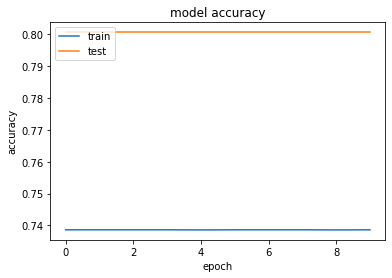

In [63]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

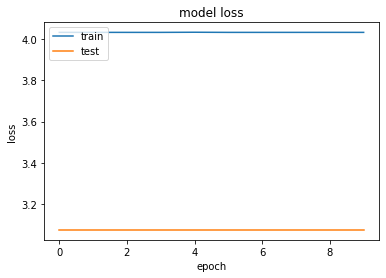

In [64]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()